In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from matplotlib import rc

df = pd.read_csv('/content/drive/MyDrive/Datasets/CSV and Excel files/telcoCustomerChurnClean.csv')
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [49]:
# stats
df.describe(include=['int64', 'float64'])

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
# churn rates
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


### Univariate Analysis

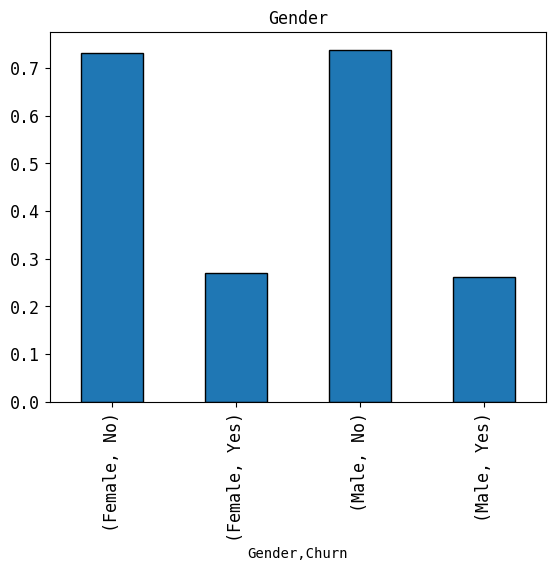

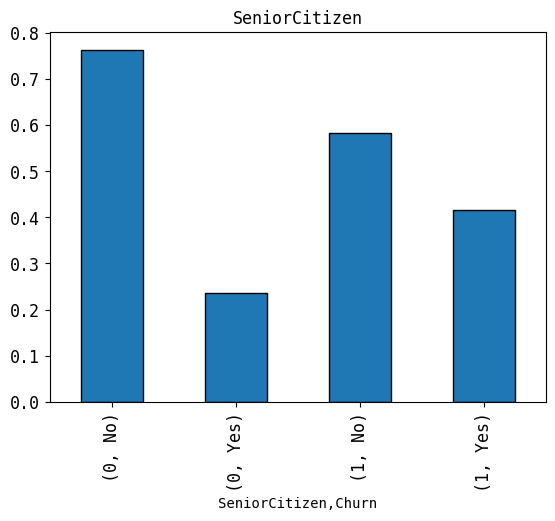

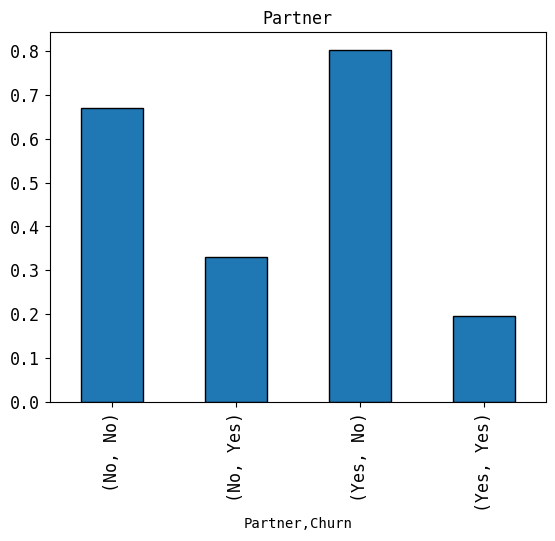

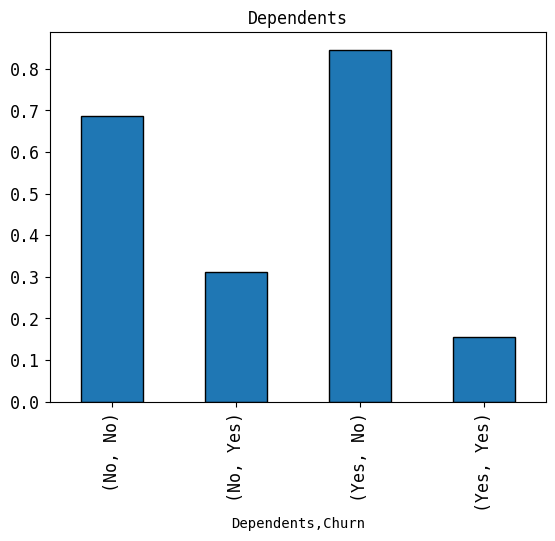

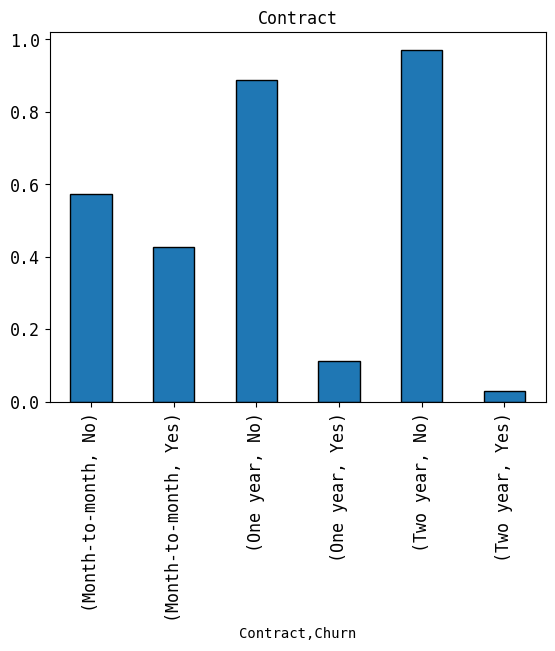

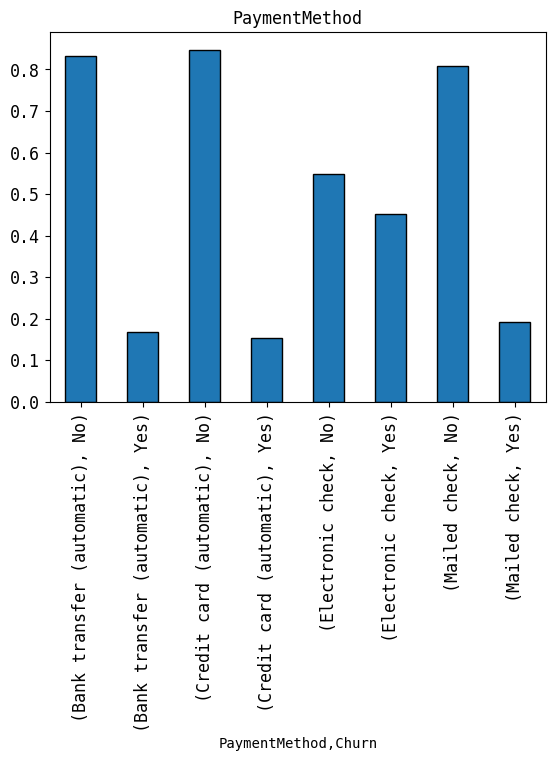

In [51]:
# Plotting churn distribution by categories

# plot params
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.color'] = "black"
plt.rcParams['ytick.color'] = "black"

cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod']
for col in cols:
  churnRate = df.groupby(col)['Churn'].value_counts(normalize=True)
  churnRate.plot(kind="bar", title=col, ec="black")
  plt.show()

Text(0.5, 0.98, 'Tenure Distribution by Churn')

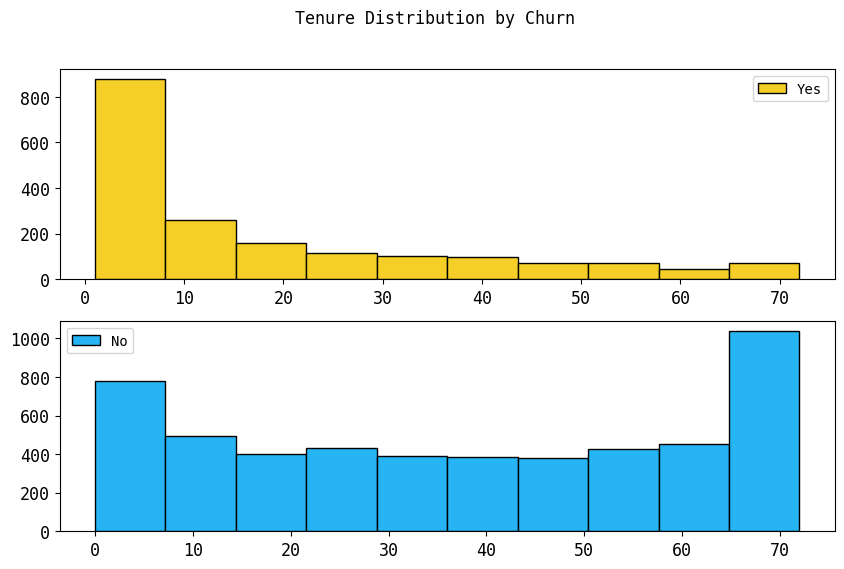

In [52]:
# Histograms / KDE plots (tenure based on churn)
tenureYesChurn = df[df['Churn'] == 'Yes']['Tenure'].values
tenureNoChurn = df[df['Churn'] == 'No']['Tenure'].values

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

ax[0].hist(tenureYesChurn, color="#F5CF27", edgecolor="black", label="Yes")
ax[0].legend(loc="best")

ax[1].hist(tenureNoChurn, color="#27B4F5", edgecolor="black", label="No")
ax[1].legend(loc="best")

plt.suptitle("Tenure Distribution by Churn")

# people leave the most after less than 10 months while people with 65+ months
# are the ones that stay the most

### Bivariate / Multivariate Analysis

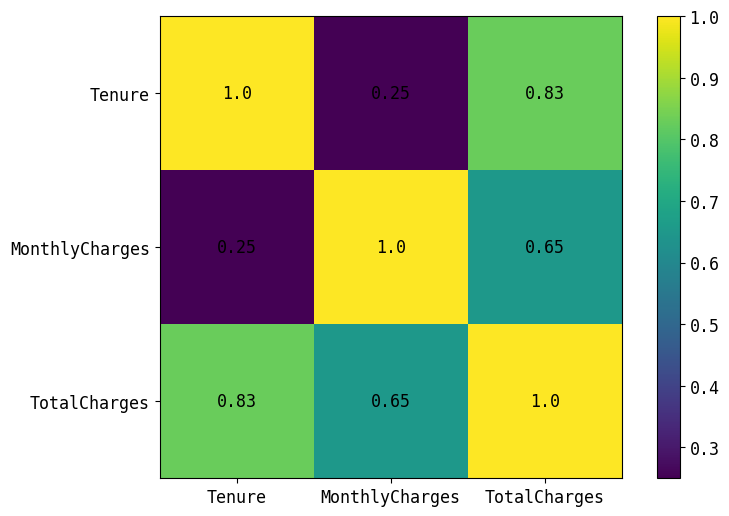

In [53]:
# correlation analysis (numerical only) --> Tenure and TotalCharges are the most correlated
dfCorrs = df[['Tenure', 'MonthlyCharges', 'TotalCharges']].corr(method='pearson')
dfCorrs = dfCorrs.round(2)

plt.figure(figsize=(9, 6))
corrHeatmap = plt.imshow(dfCorrs, cmap='viridis')
plt.xticks(range(len(dfCorrs.index)), labels=dfCorrs.index)
plt.yticks(range(len(dfCorrs.columns)), labels=dfCorrs.columns)
plt.colorbar(corrHeatmap)

for i in range(len(dfCorrs.columns)):
  for j in range(len(dfCorrs.index)):
    text = plt.text(j, i, s=dfCorrs.iloc[i, j], ha="center", va="center",
                    color = "black", fontsize=12)

<Axes: title={'center': 'Contract vs Churn'}, xlabel='Contract'>

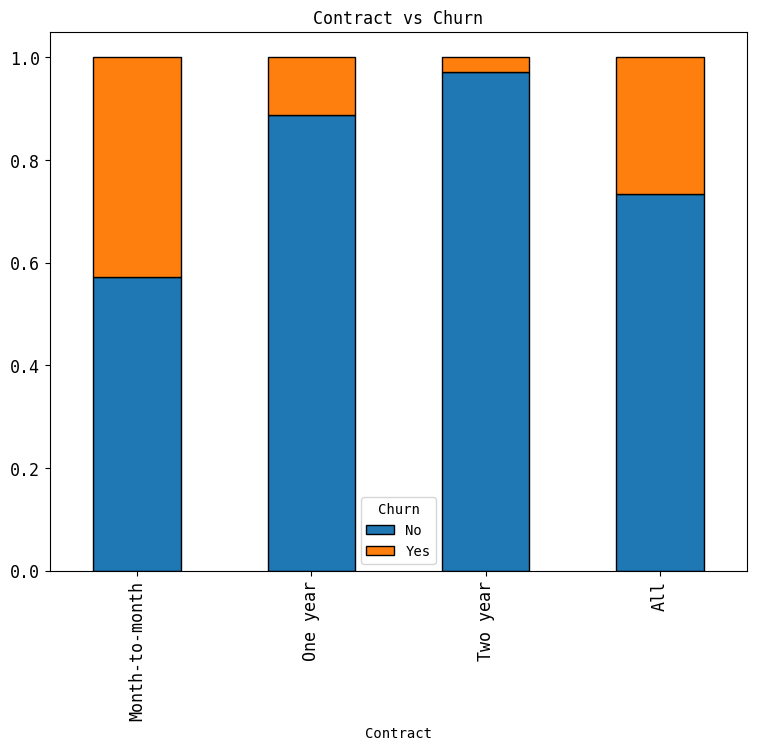

In [54]:
# Using crosstab for categorical interactions
crossT = pd.crosstab(index=df['Contract'], columns=df['Churn'], margins=True, normalize='index')
crossT # People on a Month-to-Month contract churn the most
crossT.plot(kind="bar", edgecolor="black", stacked=True,
            title="Contract vs Churn", figsize=(9, 7))

### Advanced Insights

<Axes: title={'center': 'Avg. CLV by Churn'}, xlabel='Churn'>

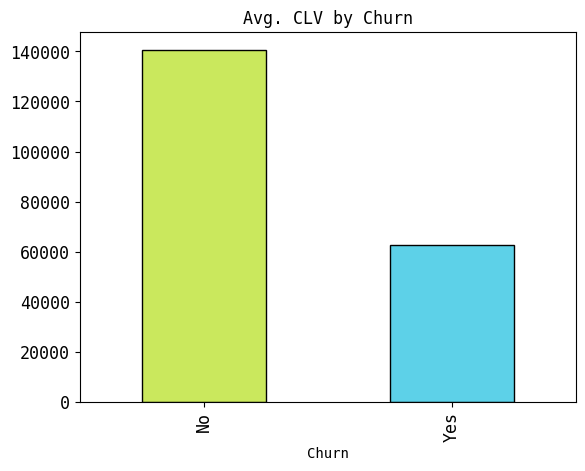

In [55]:
# Avg. Customer Lifetime Value by Churn --> churners usually have lower CLV as in this case
df['CLV'] = df['TotalCharges'] * df['Tenure']

avgClvByChurn = df.groupby('Churn')['CLV'].mean()
avgClvByChurn = avgClvByChurn.round(2)
avgClvByChurn.plot(kind='bar', ec='black', color=['#CAE85D', '#5DD1E8'],
                   title='Avg. CLV by Churn')


Text(0.5, 1.0, 'Average Number of Services by Churn')

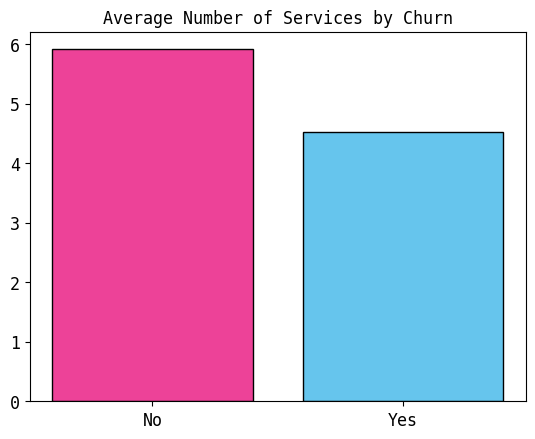

In [56]:
# Average Number of Services by Churn --> those who don't churn have more services
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df['Total Services'] = df[services].apply(lambda x: sum(x != 'No'), axis=1)
avgNumServicesByChurn = df.groupby('Churn')['Total Services'].mean()

plt.bar(avgNumServicesByChurn.index, avgNumServicesByChurn.values, ec="black",
        color=['#ED4298', '#66C5ED'])
plt.title('Average Number of Services by Churn')

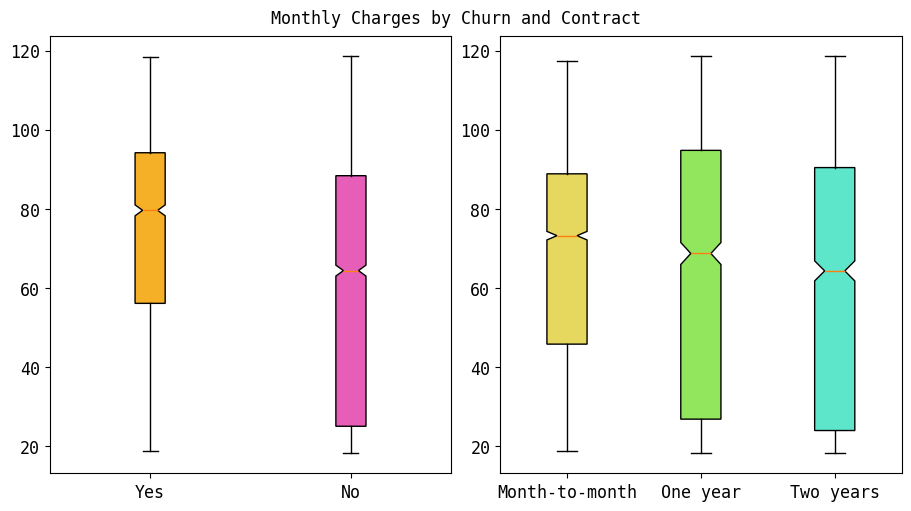

In [57]:
# monthly charges by Churn
monthlyChargesChurnYes = df[df['Churn'] == 'Yes']['MonthlyCharges'].values
monthlyChargesChurnNo = df[df['Churn'] == 'No']['MonthlyCharges'].values
churnColors = ['#F5B027', '#E65EB8']

monthlyChargesContractMonth = df[df['Contract'] == 'Month-to-month']['MonthlyCharges'].values
monthlyChargesContractOneYear = df[df['Contract'] == 'One year']['MonthlyCharges'].values
monthlyChargesContractTwoYear = df[df['Contract'] == 'Two year']['MonthlyCharges'].values
contractColors = ['#E6D85E', '#92E65E', '#5EE6CB']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

boxplotChurn = axes[0].boxplot([monthlyChargesChurnYes, monthlyChargesChurnNo], tick_labels=['Yes', 'No'],
                notch=True, patch_artist=True)
boxplotContract = axes[1].boxplot([monthlyChargesContractMonth, monthlyChargesContractOneYear, monthlyChargesContractTwoYear],
                tick_labels=['Month-to-month', 'One year', 'Two years'], notch=True, patch_artist=True)
plt.suptitle('Monthly Charges by Churn and Contract')

# setting the colors
for patch, color in zip(boxplotChurn['boxes'], churnColors):
  patch.set_facecolor(color)

for patch, color in zip(boxplotContract['boxes'], contractColors):
  patch.set_facecolor(color)

<Axes: xlabel='SeniorCitizen,Contract'>

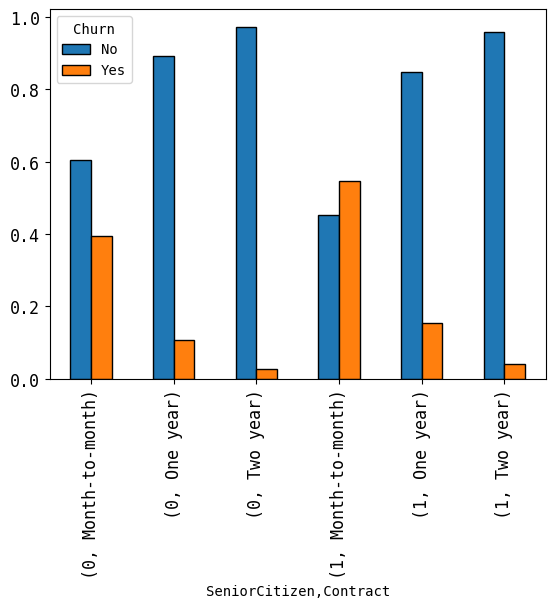

In [58]:
# Creating churn “risk profiles”
df.groupby(['SeniorCitizen', 'Contract'])['Churn'].value_counts(normalize=True).unstack().plot(kind="bar", edgecolor="black")

### FuncAnimation: Animated Churn by Tenure

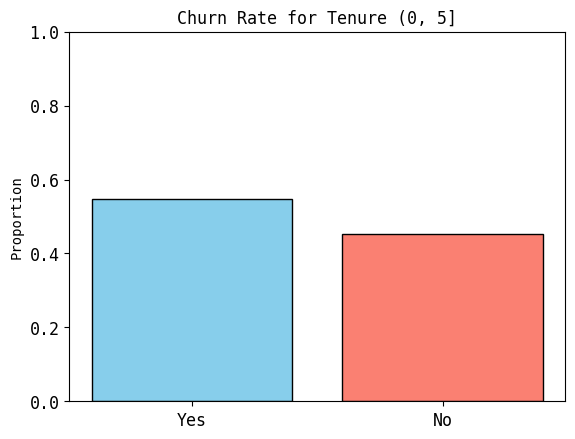

In [59]:
rc('animation', html='jshtml')

df['Tenure Bin'] = pd.cut(df['Tenure'], bins=np.arange(0, 80, 5))
tenureGroups = df['Tenure Bin'].cat.categories

fig, ax = plt.subplots()

def animate(i):
  ax.clear()
  binVal = tenureGroups[i]
  subset = df[df['Tenure Bin'] == binVal]
  counts = subset['Churn'].value_counts(normalize=True)
  ax.bar(counts.index, counts.values, color=['skyblue', 'salmon'], ec="black")
  ax.set_ylim(0, 1)
  ax.set_title(f'Churn Rate for Tenure {binVal}')
  ax.set_ylabel("Proportion")

anim = FuncAnimation(
    fig=fig,
    func=animate,
    frames=len(tenureGroups),
    interval=700,
    repeat=True
)
anim

# CONCLUSIONS AND INSIGHTS

### Churn Imbalance
-Around ~26% of customers churned, which indicates moderate class imbalance.

-This must be handled carefully in modeling (e.g., SMOTE, class weights).

### Contract Type is the Strongest Signal
-Customers on month-to-month contracts churn far more often than those with one-year or two-year contracts.

-Long-term contracts act as a strong retention factor.

### Tenure is Highly Predictive
-Churners tend to have shorter tenures (newer customers leave more often).

-Customers who stay beyond ~24 months are significantly less likely to churn.

### Payment Method Matters
-Customers paying with electronic check show a much higher churn rate compared to those using credit cards or bank transfers.

-This could be linked to payment convenience and perceived reliability.

### Internet Service Differences
-Fiber optic users churn more often than DSL users, possibly due to service issues or competition.

-Customers with "No internet service" have very low churn (they are stable, legacy customers).

### Additional Services Reduce Churn
-Customers who subscribe to multiple add-on services (Online Security, Tech Support, Streaming, etc.) are less likely to churn.

-Having more services creates a "stickiness effect".

### Charges & Lifetime Value
-Higher Monthly Charges are correlated with higher churn, especially for month-to-month customers.

-However, Total Charges (proxy for Customer Lifetime Value) is much lower among churners, since they leave early.

### Senior Citizens

-Senior citizens show a slightly higher churn rate but the effect is weaker compared to contract/payment factors.